# Exercise 3 - Linear regression optimisation

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

a) Read the data in separate variables for the training and test sets.

In [27]:
dataset_train = pd.read_csv('overfitting_train.csv')
dataset_test = pd.read_csv('overfitting_test.csv')

In [28]:
dataset_train.head()

,x,y
0,-1.000000,-1.859783
1,0.333333,2.768337
2,1.666667,3.246021
3,3.000000,1.784168
4,4.333333,2.175140


In [29]:
dataset_test.head()

,x,y
0,-0.300000,0.724588
1,0.833333,5.358981
2,2.166667,3.353027
3,3.200000,2.264404
4,4.833333,3.778459


In [30]:
X_train = dataset_train['x'].values
y_train = dataset_train['y'].values
X_test = dataset_test['x'].values
y_test = dataset_test['y'].values

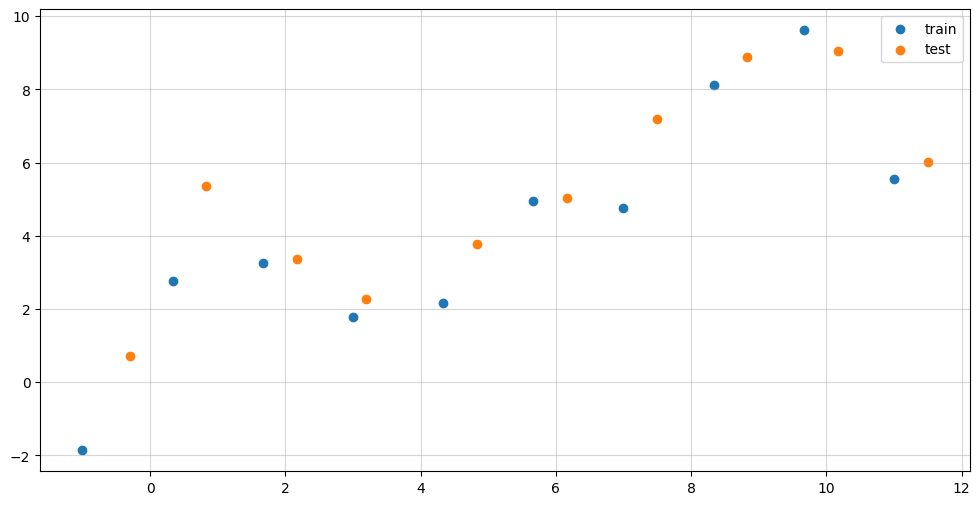

In [31]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.legend(['train', 'test']);

b) Define a cost function
$J(θ)$
that will allow you to compute the cost on the training and
cross-validation sets.


$$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$$

where $h_{\theta}(\mathbf{x}_{n})$ is your prediction.

In [32]:
def compute_cost(y_pred, y_true):
    N = y_pred.shape[0]
    return (1.0 / (2.0 * N)) * np.sum((y_pred - y_true)**2)

c) Perform the training for increasing orders $O= 1 ,..., 10$.

You can use any training method developed in the previous practical work. Using the [normal equation](http://mlwiki.org/index.php/Normal_Equation) is probably the easiest choice.

In [55]:


def lin_reg_normal_lieLou(x,y):
    X_transpose = np.transpose(x)
    X_transpose_X = np.dot(X_transpose, x)
    X_transpose_y = np.dot(X_transpose, y)
    return np.linalg.solve(X_transpose_X, X_transpose_y)

#la fonction que j'ai utilisé dans le PW04 transme
def lin_reg_normal_lieLou2(x,y):
    x0  = np.ones(len(x))
    X_t = np.column_stack((x0, x))

    return np.linalg.inv(X_t.T.dot(X_t)).dot(X_t.T).dot(y)
    
def fit(X_train: np.array, y_train: np.array, order: float) -> np.array:
    thetas = []

    X_Ord = np.power(X_train[:, None], np.arange(order + 1))
    theta = lin_reg_normal_lieLou(X_Ord, y_train)
    thetas.append(theta)
    return thetas

def predict(thetas: np.array, X: np.array) -> np.array:
    y_pred = np.zeros(len(X))
    
    for i in range(len(thetas)):
        theta = thetas[i]
        polynome = np.poly1d(np.flip(theta))
        y_pred += polynome(X)
    return y_pred

Order=0; cost on train set: 1.41; cost on test set: 1.68
Order=1; cost on train set: 1.35; cost on test set: 1.61
Order=2; cost on train set: 1.31; cost on test set: 1.54
Order=3; cost on train set: 0.20; cost on test set: 1.03
Order=4; cost on train set: 0.20; cost on test set: 0.98
Order=5; cost on train set: 0.14; cost on test set: 2.19
Order=6; cost on train set: 0.11; cost on test set: 4.39
Order=7; cost on train set: 0.05; cost on test set: 1.52
Order=8; cost on train set: 0.00; cost on test set: 137.78
Order=9; cost on train set: 0.00; cost on test set: 212.22


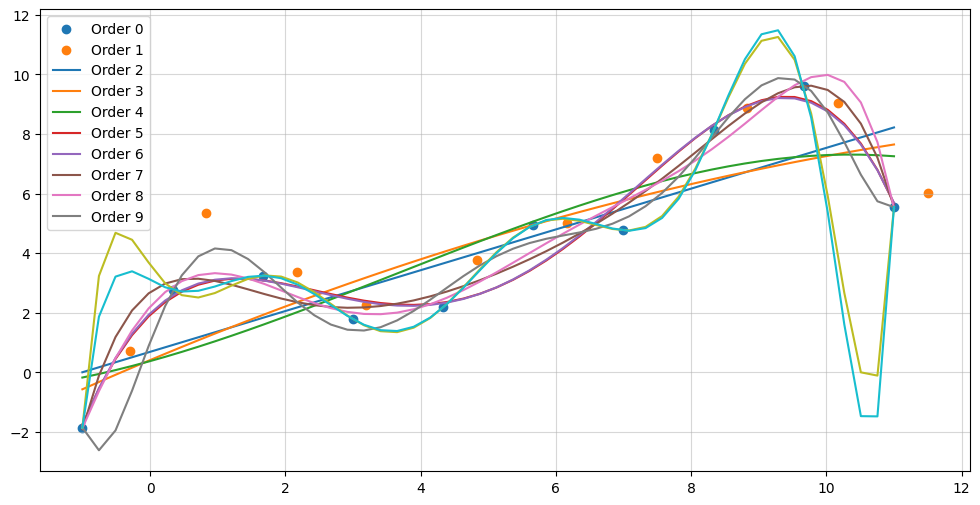

In [56]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

train_cost_curve = []
test_cost_curve = []



for order in range(10):
    thetas = fit(X_train, y_train, order + 1)
    x = np.linspace(np.min(X_train), np.max(X_train))
    
    # Predict and plot the curve
    y_train_pred = predict(thetas, x)
    plt.plot(x, y_train_pred)

    # Test on train set
    y_train_pred = predict(thetas, X_train)
    cost_train = compute_cost(y_train, y_train_pred)
    train_cost_curve.append(cost_train)

    # Test on test set
    y_test_pred = predict(thetas, X_test)
    cost_test = compute_cost(y_test, y_test_pred)
    test_cost_curve.append(cost_test)

    print(f"Order={order}; cost on train set: {cost_train:.2f}; cost on test set: {cost_test:.2f}")


plt.legend([f"Order {i}" for i in range(10)]);

e) Plot the evolution of the costs
$J_{train}(θ)$ and $J_{cv}(θ)$
as a function of the order O.

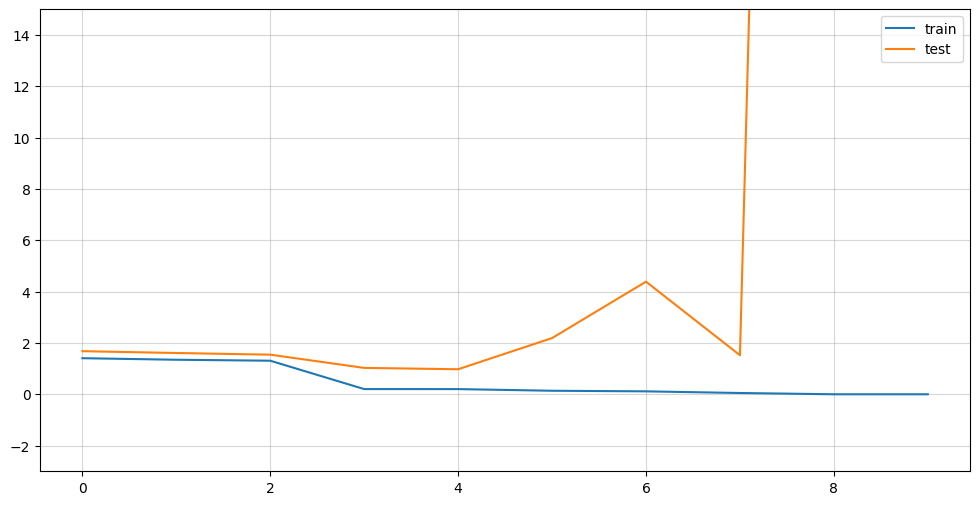

In [48]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.plot(train_cost_curve)
plt.plot(test_cost_curve)
plt.ylim(-3, 15)
plt.legend(['train', 'test']);


**f) What is your best model according to these costs ? Comment your answer.**

We can clearly see the fourth order regretion is the best. both coefficient (train and test) are the lowest.

**g) Would you still choose the model with the lowest cost for production?**

Yes of cours, this modele of meaking prediction have highest accuracy. It's very important in a production wold to minimize the errors.

**h) Explain how under/over-fitting is involved here.**

Here, the underfitting happen when the prediction modele is too weak. it can't capture the underlying patterns. in this case the polynomial degree is too low. the result is that we have high errors on both data sets.

For the overfitting, the modele is too much train and follow exclusivly the train dataset. In this case the noise is also captured.

The choise of the polynomial degree is very crutial to balance those two issues. In this case the fourth degree was the best one. 